In [1]:
import math
lines = []
path = "Desktop/step-data/"
name = "2-200-step-variable.csv"
with open(path + name) as reader:
     lines = reader.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/step-data/2-200-step-variable.csv'

In [2]:
acc_x = []
acc_y = []
acc_z = []
gyro_x = []
gyro_y = []
gyro_z = []
acc_net = []
gyro_net = []
acc_avr = []

def get_magnitude(x,y,z):
    return (x**2 + y**2 + z**2)**0.5

def get_averageList(data):
    return [(data[i-1] + data[i])/2.0 for i in range(1,len(data))]

for i in range(1,len(lines)):
    data = list(lines[i:i+1])
    data = data[0].split(",")
    acc_x.append(float(data[0]))
    acc_y.append(float(data[1]))
    acc_z.append(float(data[2]))
    gyro_x.append(float(data[3]))
    gyro_y.append(float(data[4]))
    gyro_z.append(float(data[5]))
acc_net = [get_magnitude(acc_x[i], acc_y[i], acc_z[i]) for i in range(len(acc_x))]
acc_avr = get_averageList(acc_net)


In [3]:
import matplotlib.pyplot as plt 
%matplotlib notebook

<IPython.core.display.Javascript object>


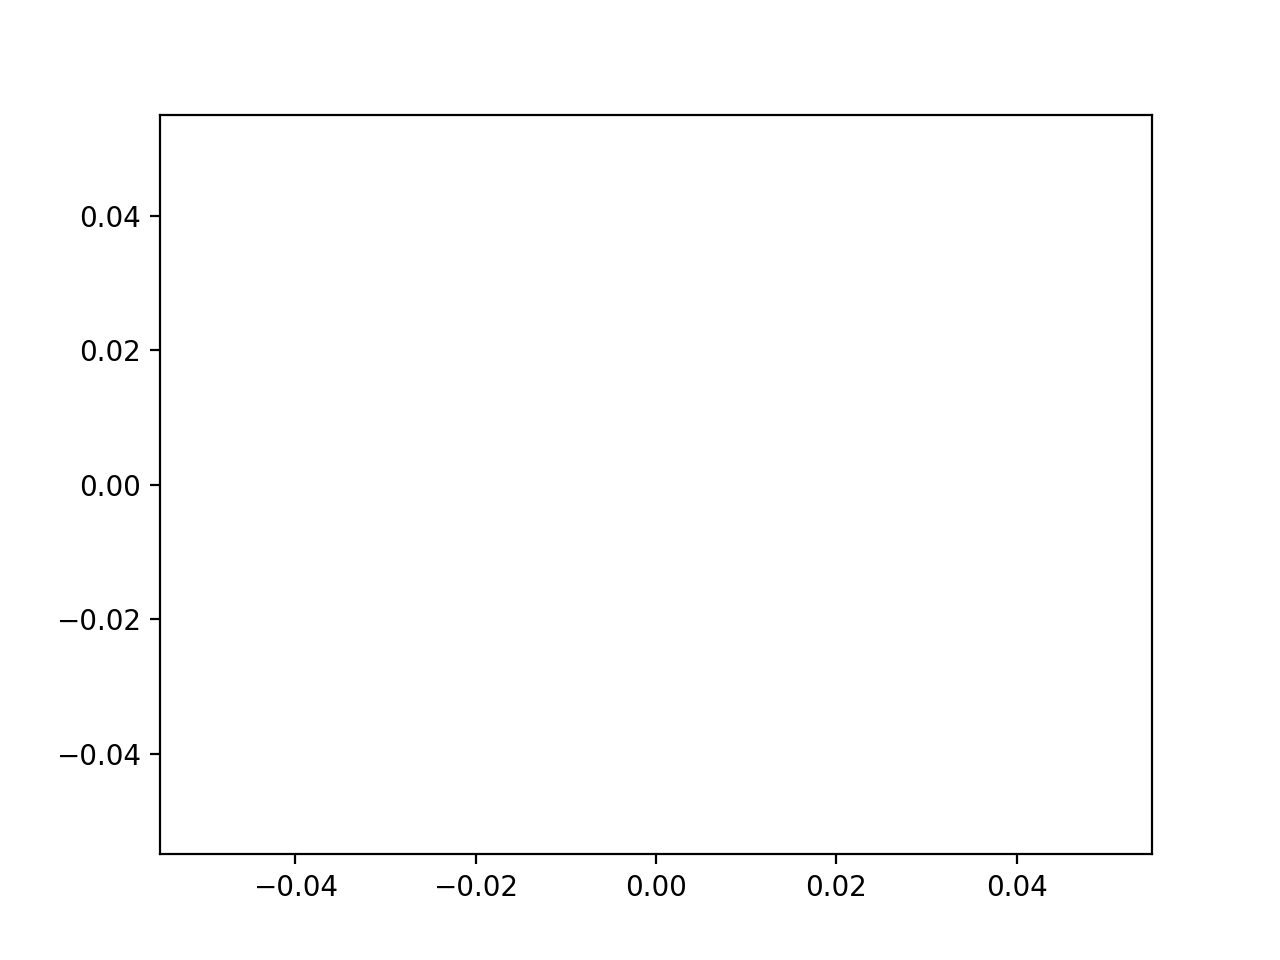

In [4]:
plt.plot(acc_net[0:600], "b-")
plt.show()

In [5]:
def get_peaks(data):
    peaks_x = []
    mean = get_mean(data)
    standard_deviation = calc_standard_deviation(data)
    for i in range(1, len(data) - 1):
        if(data[i] > data[i-1] and data[i] > data[i+1] and abs(data[i]-mean) >= standard_deviation*2.5 and data[i] > acc_avr[i]): 
            peaks_x.append(i)
    peaks_y = [data[index] for index in peaks_x]
    return peaks_x, peaks_y

def get_mean(data):
    calculate = 0
    average = []
    for i in data:
        calculate = calculate + i
    average = calculate/len(data)
    return average

def average_time(data):
    avr_time = 0
    for i in range(len(data)-1):
        avr_time += data[i+1] - data[i]
    avr_time = avr_time/len(data)
    return avr_time

def calc_standard_deviation(data):
    mean = get_mean(data)
    sum = 0
    deviation = 0
    for i in data:
        sum = sum + ((i - mean) * (i - mean))
    sum = sum/(len(data)-1)
    deviation = sum**0.5
    return deviation


In [6]:
peaks_x, peaks_y = get_peaks(acc_net[0:600])
#mean = [] 
#mean = [get_mean(acc_x[400:600]) + (calc_standard_deviation(acc_x[400:600])*2) for i in acc_x[400:600]]
#mean is a list that plots the mean of the data



KeyboardInterrupt



In [ ]:
def double_check_peaks(data_x, data_y):
    new_x = []
    new_y = []
    average = average_time(data_x)
    mean = get_mean(data_y)
    standard_deviation = calc_standard_deviation(data_y)
    for i in range(len(data_x)-1):
        if( not ((abs(data_x[i+1] - data_x[i]) < average and data_y[i] < mean + standard_deviation))):
            new_x.append(data_x[i])
            new_y.append(data_y[i])
    return new_x, new_y


peaks_x, peaks_y = double_check_peaks(peaks_x, peaks_y)

In [ ]:
plt.plot(peaks_x, peaks_y, "ro")
#plt.plot(mean, "g-") 
plt.show()
print(len(peaks_x)*2)